In [1]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import mean_squared_error
# Add the path to the folder containing the script
script_path = Path('../../PreProcessing').resolve()
sys.path.insert(0, str(script_path))
import loadDataFull
from DS import data_ds_fixed
from PDS import data_pds_fixed

script_path = Path('../../Networks').resolve()
sys.path.insert(0, str(script_path))
from TCOCNNs import TCOCNNsClass
from TCOCNN import TCOCNNClass

../../Data/VOC4IAQ/sgp40_S1.mat
acetone
Split
RandomFlag
False


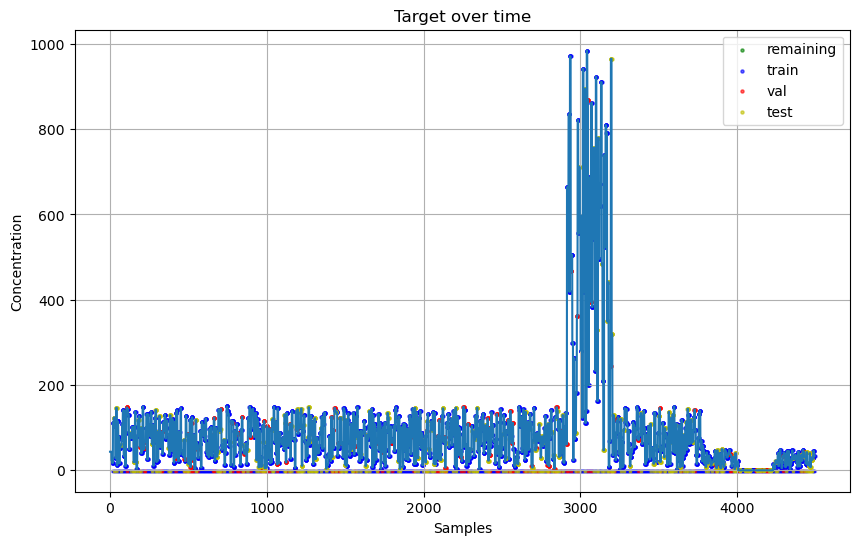

../../Data/VOC4IAQ/sgp40_S2.mat
acetone
Split
RandomFlag
False


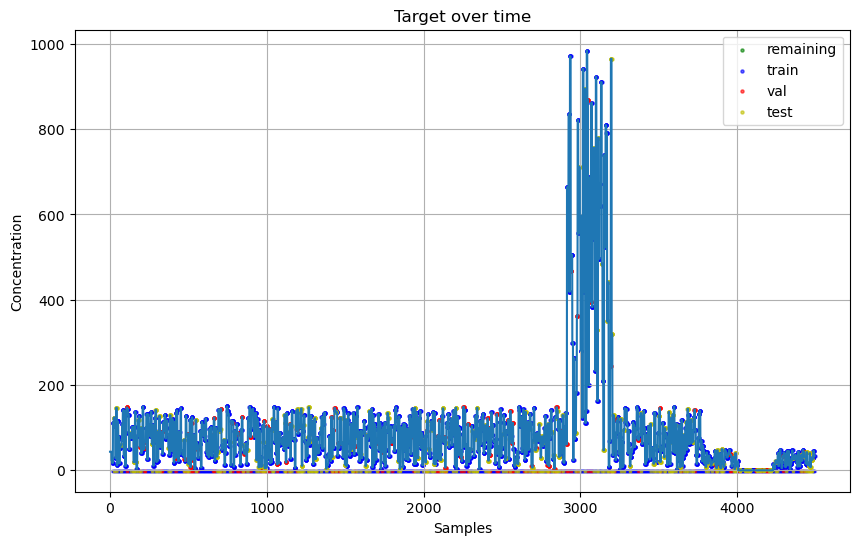

../../Data/VOC4IAQ/sgp40_S3.mat
acetone
Split
RandomFlag
False


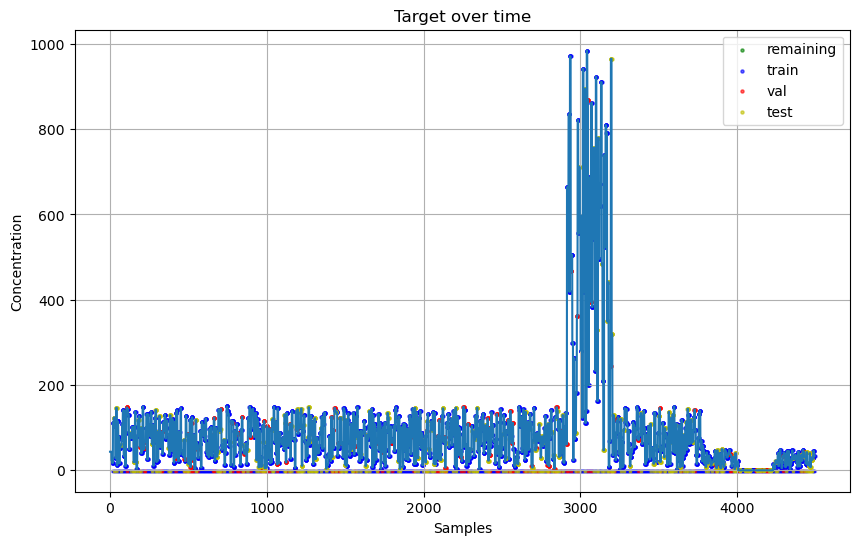

../../Data/VOC4IAQ/sgp40_S4.mat
acetone
Split
RandomFlag
False


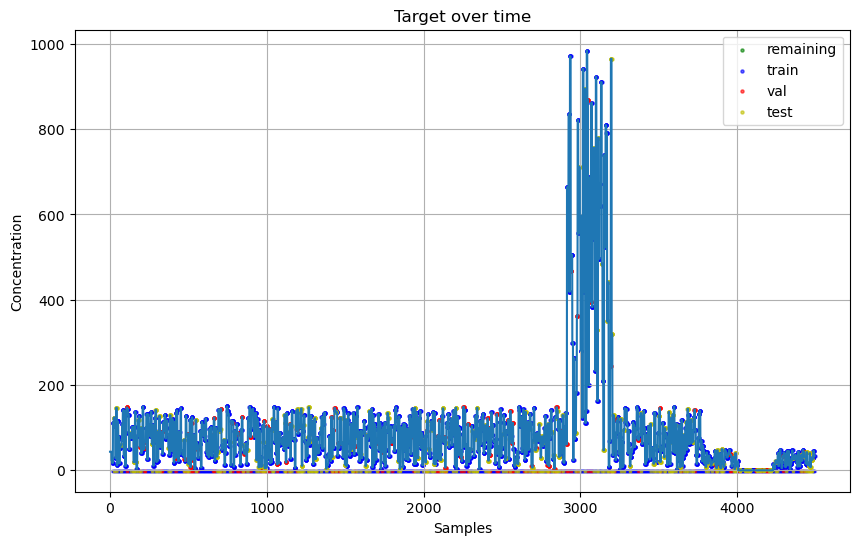

../../Data/VOC4IAQ/sgp40_S5.mat
acetone
Split
RandomFlag
False


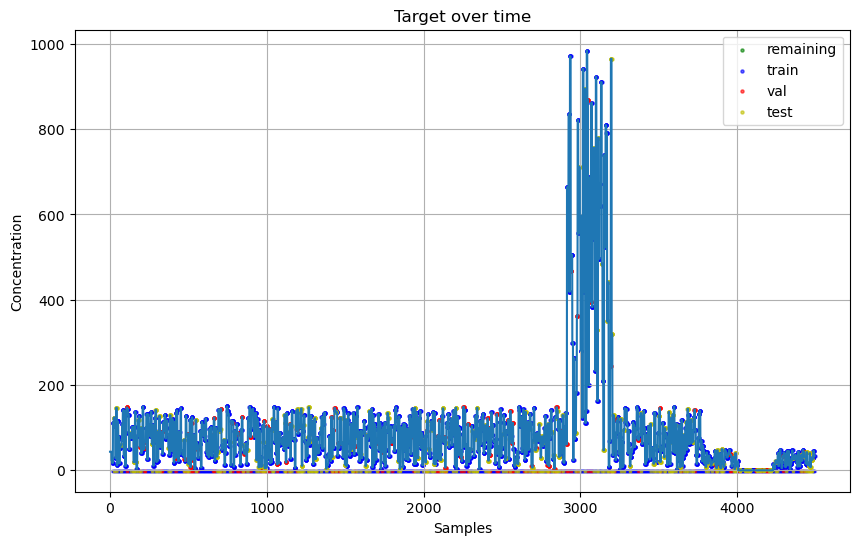

../../Data/VOC4IAQ/sgp40_S6.mat
acetone
Split
RandomFlag
False


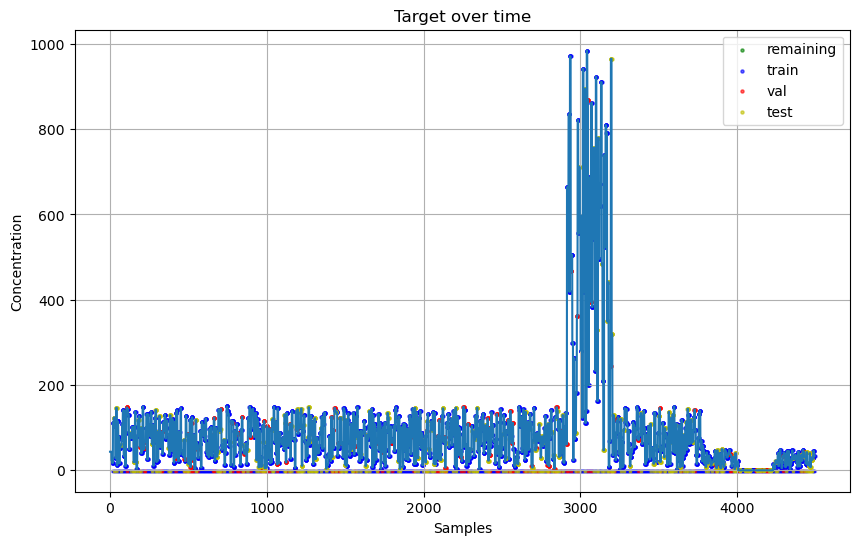

In [2]:


# DataLocation
locationData = "../../Data/VOC4IAQ/"

loadStruct = {}
# Struct DataLocation
loadStruct["fileNameDataAll"] = [locationData + "sgp40_S1.mat",locationData + "sgp40_S2.mat",locationData + "sgp40_S3.mat",locationData + "sgp40_S4.mat",locationData + "sgp40_S5.mat",locationData + "sgp40_S6.mat"]
loadStruct["fileNameTargetAll"] = [locationData + "targets_SGP40.mat",locationData + "targets_SGP40.mat",locationData + "targets_SGP40.mat",locationData + "targets_SGP40.mat",locationData + "targets_SGP40.mat",locationData + "targets_SGP40.mat"]

# Struct DataLocation
#loadStruct["fileNameDataAll"] = [locationData + "sensorA.mat",locationData + "sensorA.mat"]
#loadStruct["fileNameTargetAll"] = [locationData + "targets.mat",locationData + "targets.mat"]
loadStruct["targetGas"] = 'acetone'

# Used Method %see LoadDataFull 1: 70% 10% 20% Split
loadStruct["loadMethod"] = 1

# Expected Input Dimensions
loadStruct["dataSize"] = [4, 1440]

# Expected Output Dimensions
loadStruct["Outputsize"] = 1

# Specify Regression or Classification
loadStruct["Regression"] = True

# SaveFlag 
loadStruct["saveFlag"] = True

# Random Flag; False: Reproducible random Samples; True: in every execution Random
loadStruct["randomFlag"] = False

# NormalizeInput 
loadStruct["normFlag"] = True

loadStruct["OcclusionFlag"] = False

loadStruct["saveName"] = locationData + "Szenario_SA_1_Acetone.mat"

# Not the exact split is performed than in the original data (~20 UGMs less in test Set)
[data, target] = loadDataFull.load_Data_Full(loadStruct)


../../Data/VOC4IAQ/sgp40_S7.mat
acetone
Transfer
RandomFlag
False


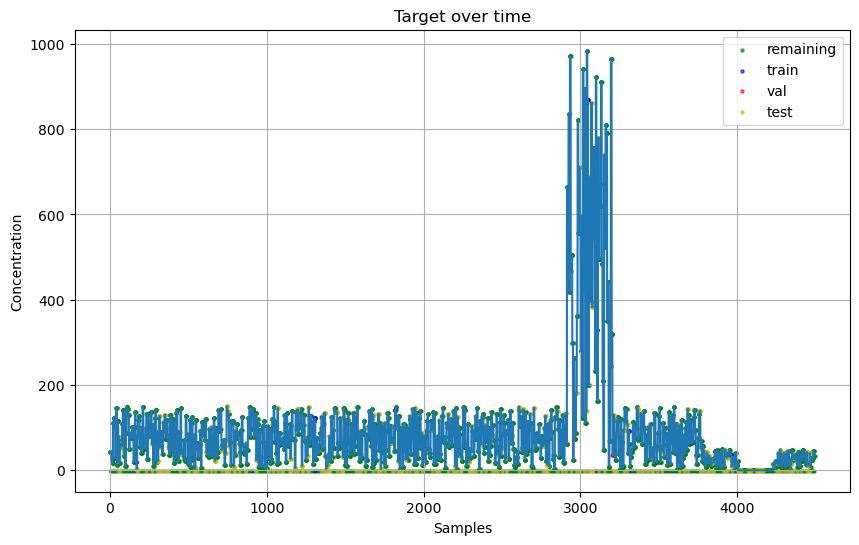

In [3]:

locationData = "../../Data/VOC4IAQ/"

loadStruct = {}
# Struct DataLocation
loadStruct["fileNameDataAll"] = [locationData + "sgp40_S7.mat"]
loadStruct["fileNameTargetAll"] = [locationData + "targets_SGP40.mat"]

# Struct DataLocation
#loadStruct["fileNameDataAll"] = [locationData + "sensorA.mat",locationData + "sensorA.mat"]
#loadStruct["fileNameTargetAll"] = [locationData + "targets.mat",locationData + "targets.mat"]
loadStruct["targetGas"] = 'acetone'

# Used Method %see LoadDataFull 1: 70% 10% 20% Split
loadStruct["loadMethod"] = 2

# Specify RNG for good transfer
loadStruct['rng_val'] = 4

#Specific for Method 2 defines the number of transfer UGMs
loadStruct['transf'] = 10

# Expected Input Dimensions
loadStruct["dataSize"] = [4, 1440]

# Expected Output Dimensions
loadStruct["Outputsize"] = 1

# Specify Regression or Classification
loadStruct["Regression"] = True

# SaveFlag 
loadStruct["saveFlag"] = True

# Random Flag; False: Reproducible random Samples; True: in every execution Random
loadStruct["randomFlag"] = False

# NormalizeInput 
loadStruct["normFlag"] = True

loadStruct["OcclusionFlag"] = False

loadStruct["saveName"] = locationData + "Szenario_SA_1_Acetone.mat"

# Not the exact split is performed than in the original data (~20 UGMs less in test Set)
[dataTrans, targetTrans] = loadDataFull.load_Data_Full(loadStruct)


In [4]:
data['train'].shape

(18720, 4, 1440, 1)

In [5]:
model = TCOCNNClass((4,1440,1), 1, regression=True)
with open('../acetoneParams.json', 'r') as f:
        data_dict = json.load(f)


model.build_net(data_dict)
model.compile_model(data_dict['initial_learning_rate'])
model.train(data['train'], target['train'])

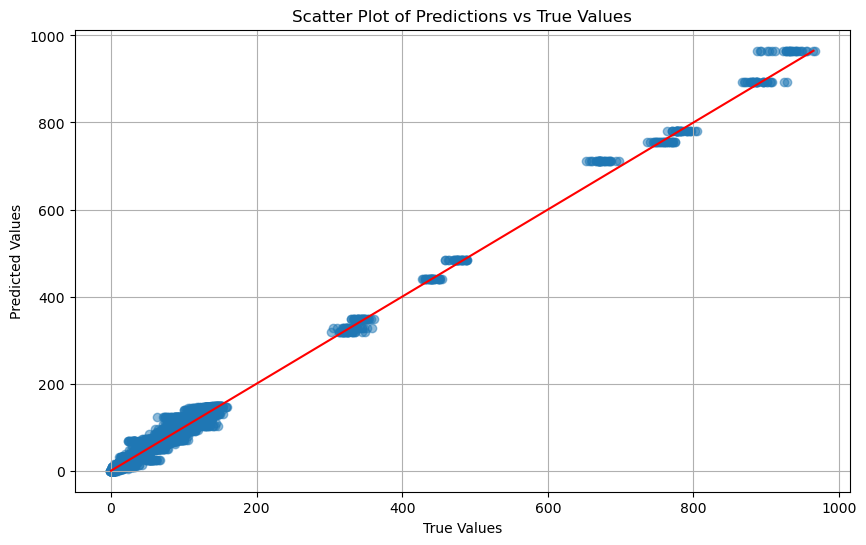

Root Mean Squared Error (RMSE): 10.964769667985601


In [6]:
pred = model.predict(data["test"])
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pred, target["test"], alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs True Values')
plt.plot([min(target["test"]), max(target["test"])], [min(target["test"]), max(target["test"])], color='red')  # Line of perfect prediction
plt.grid(True)
plt.show()
rmse = np.sqrt(mean_squared_error(pred, target['test']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

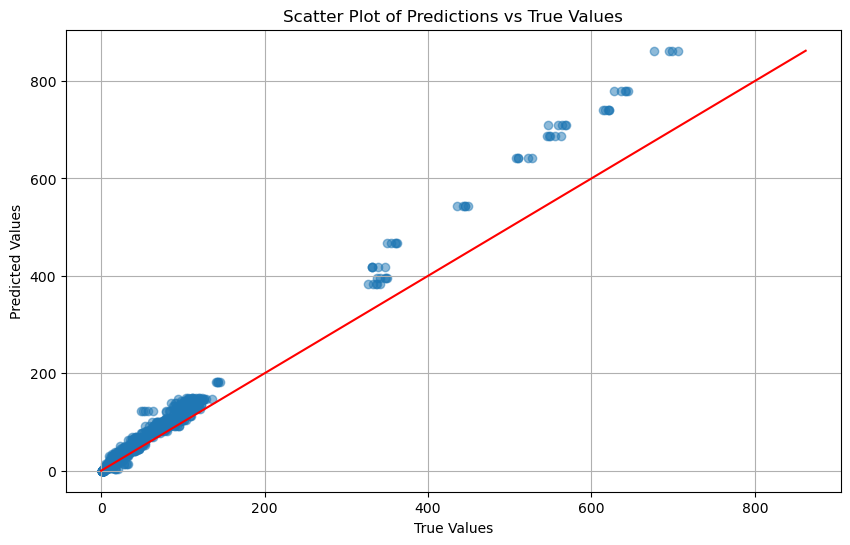

Root Mean Squared Error (RMSE): 34.105251664256514


In [7]:
pred = model.predict(dataTrans["test"])
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pred, targetTrans["test"], alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs True Values')
plt.plot([min(targetTrans["test"]), max(targetTrans["test"])], [min(targetTrans["test"]), max(targetTrans["test"])], color='red')  # Line of perfect prediction
plt.grid(True)
plt.show()
rmse = np.sqrt(mean_squared_error(pred, targetTrans['test']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Retraining completed.


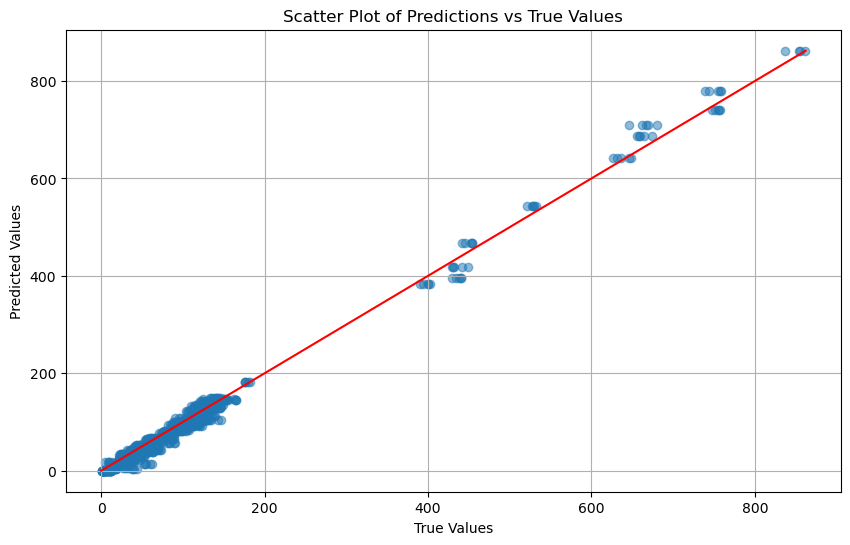

Root Mean Squared Error (RMSE): 12.913829867242244


In [8]:
model_copy = model.copy()
model_copy.retrain(dataTrans['train'], targetTrans['train'],new_learning_rate=data_dict['initial_learning_rate']*0.9**15)
pred = model_copy.predict(dataTrans["test"])
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pred, targetTrans["test"], alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs True Values')
plt.plot([min(targetTrans["test"]), max(targetTrans["test"])], [min(targetTrans["test"]), max(targetTrans["test"])], color='red')  # Line of perfect prediction
plt.grid(True)
plt.show()
rmse = np.sqrt(mean_squared_error(pred, targetTrans['test']))
print(f'Root Mean Squared Error (RMSE): {rmse}')